In [164]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import data

# Assuming that you have completed training the classifer, let us plot the training loss vs. iteration. This is an
# example to show a simple way to log and plot data from PyTorch.

# we neeed matplotlib to plot the graphs for us!
import matplotlib
# This is needed to save images 
matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline

/Users/ncampbell7/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Users/ncampbell7/anaconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/Users/ncampbell7/anaconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/Users/ncampbell7/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/ncampbell7/anaconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/ncampbell7/anaconda2/lib/python2.7/site-package

In [5]:
verbose = False
path = './data/2013.txt'
corpus = data.Corpus(path, verbose)

In [6]:
class LSTM_LanguageModel(nn.Module):
        
    def __init__(self, vocab_size, embed_size, nhidden, nlayers):
        super(LSTM_LanguageModel, self).__init__()
        self.encoder = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, nhidden, nlayers)
        self.decoder = nn.Linear(nhidden, vocab_size)

    def forward(self, x, h0):
        y = self.encoder(x)
        y = y.unsqueeze(0)
        y, h1 = self.rnn(y, h0)
        y = self.decoder(y)
        return y, h1

class RNN_LanguageModel(nn.Module):
        
    def __init__(self, vocab_size, embed_size, nhidden, nlayers):
        super(RNN_LanguageModel, self).__init__()
        self.encoder = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.RNN(embed_size, nhidden, nlayers)
        self.decoder = nn.Linear(nhidden, vocab_size)

    def forward(self, x, h0):
        y = self.encoder(x)
        y = y.unsqueeze(0)
        y, h1 = self.rnn(y, h0)
        y = self.decoder(y)
        return y, h1

In [7]:
vocab_size = len(corpus)
embed_size = 200
nhidden = 10
nlayers = 2
lm = RNN_LanguageModel(vocab_size, embed_size, nhidden, nlayers)
lm

RNN_LanguageModel(
  (encoder): Embedding(27738, 200)
  (rnn): RNN(200, 10, num_layers=2)
  (decoder): Linear(in_features=10, out_features=27738, bias=True)
)

In [8]:
lstm_lm = LSTM_LanguageModel(vocab_size, embed_size, nhidden, nlayers)
lstm_lm

LSTM_LanguageModel(
  (encoder): Embedding(27738, 200)
  (rnn): RNN(200, 10, num_layers=2)
  (decoder): Linear(in_features=10, out_features=27738, bias=True)
)

In [154]:
# Validating RNN.
batch_size = 5
x0 = torch.tensor([0,1,2,3,5])
h0 = torch.zeros((nlayers, batch_size, nhidden))
x1, h1 = lm(x0, h0)
lm(corpus.data[:batch_size].to(torch.long), h0)

for p in lm.parameters():
    print(p.grad)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0

In [153]:
batch_size = 5
x0 = torch.tensor([0,1,10,3,5])
h0 = torch.zeros((nlayers, batch_size, nhidden))
lstm_lm.zero_grad()
x1, h1 = lstm_lm(x0, h0)
lstm_lm(corpus.data[:batch_size].to(torch.long), h0)

for p in lstm_lm.parameters():
    print(p.grad)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])
tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0

In [219]:
'''
Converts sequence to tensor.
'''
def seq2ix(seq, corpus):
    sequence = [corpus.word2ix[val] for val in seq.split()]
    return torch.tensor(sequence)

'''
Converts tensor output to actual words.
'''
def ix2word(data, corpus):
    to_word = lambda val, corpus: corpus.ix2word[val]
    return map(lambda x: to_word(x, corpus), data)


def batch(data, i, length):
    source = data[i:i+length]
    target = data[i+1:i+length+1].to(torch.long)
    return source, target

'''
Runs a single training epoch on the dataset.

Warning: One EPOCH took
CPU times: user 2min 45s, sys: 40.5 s, total: 3min 26s
Definitely needs to be trained on ICEHAMMER GPUs.
'''
def train(lm, corpus, seq_length, criterion=nn.CrossEntropyLoss(), lr=0.01, momentum=0.9, start = 0):
    lm.train()
    optimizer = torch.optim.SGD(lm.parameters(), lr=lr, momentum=momentum)
    total_loss = 0.
    data = corpus.data
    length = data.size(0)
    iterations = 1
    for i in range(start, length-seq_length, seq_length):
        lm.zero_grad()
        source, targets = batch(data, i, seq_length)
        source = source.to(torch.long)
        h0 = torch.zeros((nlayers, source.size(0), nhidden)) #TODO Come up with better initial hidden
        output, hidden = lm(source, h0)
        output = output.squeeze()
        loss = criterion(output, targets)
        total_loss += loss.item()
        iterations += 1
        loss.backward() 
        optimizer.step()
    return total_loss / iterations

def fit(lm, epochs, seq_length = 15):
    loss_history = []
    print("Running for {} epochs".format(epochs))
    for epoch in range(epochs):
        loss = train(lm, corpus, seq_length)
        print("Loss {}, Epoch {}".format(loss, epoch))
        loss_history.append(loss)
    return loss_history

Running for 2 epochs
Loss 7.21727768756, Epoch 0
Loss 7.15023760411, Epoch 1
CPU times: user 18min 48s, sys: 1min 39s, total: 20min 27s
Wall time: 19min 43s


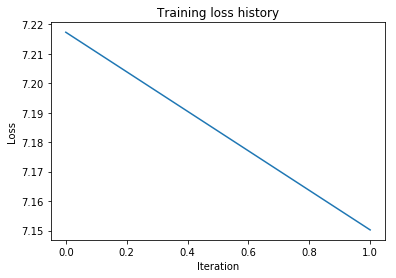

In [166]:
epochs = 2
%time loss_history = fit(lm, epochs)
if len(loss_history) > 1: # No need to plot if only one epoch of loss
    plt.plot(loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    plt.title('Training loss history')
    plt.show()
else:
    print(loss_history)

In [ ]:
epochs = 1
%time loss_history = fit(lstm_lm, epochs)
print(loss_history)

In [218]:
batch_size = 5

x0 = seq2ix("Make America", corpus)
batch_size = x0.size(0)
# x0 = torch.tensor([0,1,2,3,5])
h0 = torch.zeros((nlayers, batch_size, nhidden))
x1, h1 = lm(x0, h0)
# ix2word(x1.to(torch.int), corpus)

tensor([[1, 1, 1,  ..., 0, 1, 0]])

In [203]:
seq2ix("Make America", corpus)

torch.Size([2])